In [36]:
import pandas as pd

In [37]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

## EDA

In [38]:
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [39]:
df.shape  # 10000 rows(customer) and 12 columns (features)

(10000, 12)

In [40]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [42]:
df.isnull().sum()  # no missing values in the dataset

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

#### Statistical Outlier Detection (IQR Method)
###### After handling missing values, I performed an outlier analysis using the Interquartile Range (IQR) method to ensure data integrity:
###### Age Outliers: A total of {اكتبي الرقم اللي هيطلع لك} outliers were identified, mainly representing senior citizens (above 70-80 years old).
###### Balance Outliers: No extreme outliers were found that fall outside the logical banking range, though the distribution is influenced by zero-balance accounts.
###### Handling Decision: I decided to retain all outliers. In churn prediction, extreme values (like very high age or specific balance patterns) often carry significant predictive power. Removing them could lead to losing critical information about high-risk customer segments.

In [43]:
# Function to calculate the number of outliers using IQR
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Checking Outliers for key numerical columns
age_outliers = count_outliers(df, 'age')
balance_outliers = count_outliers(df, 'balance')

print(f"Number of outliers in Age: {age_outliers}")
print(f"Number of outliers in Balance: {balance_outliers}")

Number of outliers in Age: 359
Number of outliers in Balance: 0


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

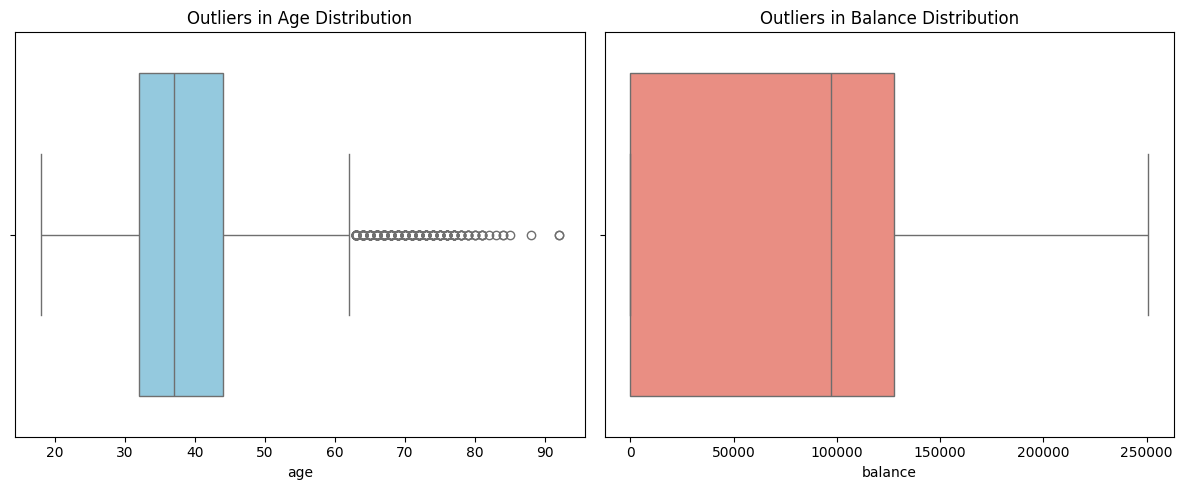

In [45]:
# Plotting Box Plots to visualize outliers
plt.figure(figsize=(12, 5))

# Subplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=df['age'], color='skyblue')
plt.title('Outliers in Age Distribution')

# Subplot for Balance
plt.subplot(1, 2, 2)
sns.boxplot(x=df['balance'], color='salmon')
plt.title('Outliers in Balance Distribution')

plt.tight_layout()
plt.show()

In [46]:
import numpy as np

In [47]:
df.isnull().sum()  # no missing values now

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [48]:
df['churn'].value_counts()
# 0 --> cutomer stayed, 1 --> customer left
# imbalanced data (customer stayed >> customer left)

churn
0    7963
1    2037
Name: count, dtype: int64

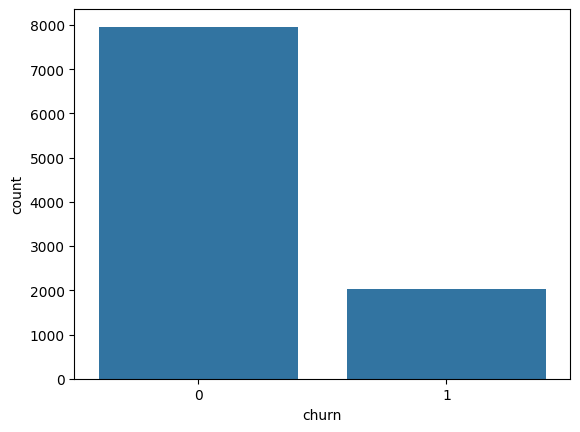

In [49]:
sns.countplot(x='churn', data=df)
plt.show()

### Numerical data

In [50]:
df.describe() # statistical summary of numerical columns
# --- Key Insight on Balance Column ---
# 1. Mean (77.5k) is lower than Median (97.3k). 
# 2. This happens because the first 25% of customers have a 0.0 balance (Min and 25% are both 0).
# 3. These "Zero-balance" customers act as outliers that pull the average (Mean) down.

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


As we can see here, the Median(50%) is higher than the Mean, which indicates a Left-Skewed distribution of non-zero balances, heavily influenced by the 25% of customers with zero balance

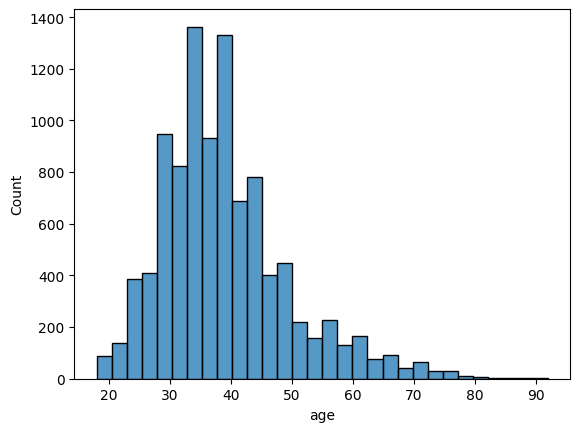

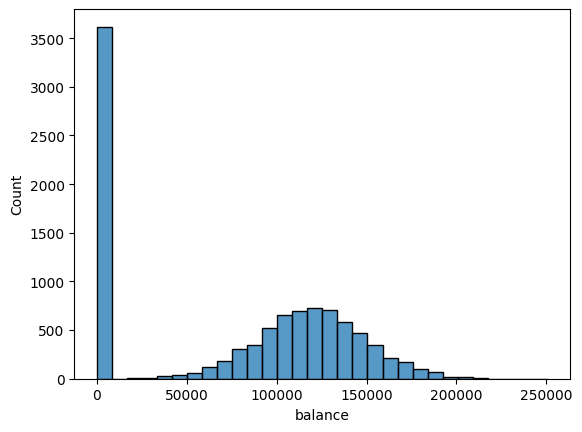

In [51]:
sns.histplot(df['age'], bins=30)
plt.show()
sns.histplot(df['balance'], bins=30)
plt.show()

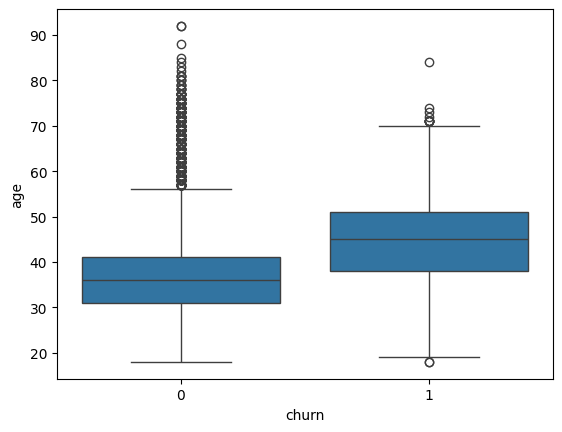

In [52]:
sns.boxplot(x='churn', y='age', data=df) # boxplot to see age distribution of cutomers that left vs stayed
plt.show()

### categorical data

In [53]:
df['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

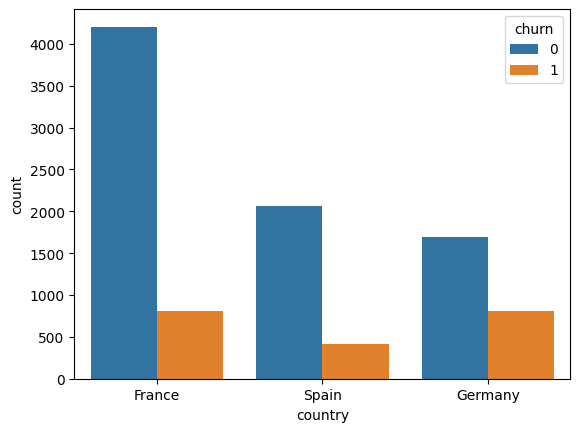

In [54]:
sns.countplot(x='country', hue='churn', data=df)
plt.show()
# --- Key Insight on Country vs Churn ---
# 1. France has the largest customer base (blue bars) among the three countries.
# 2. Germany shows a significantly higher "churn rate" (the orange bar is almost half the blue bar).
# 3. Spain appears to be the most stable market with the lowest churn numbers.
# 4. customers in Germany are leaving at a higher percentage compared to France and Spain.

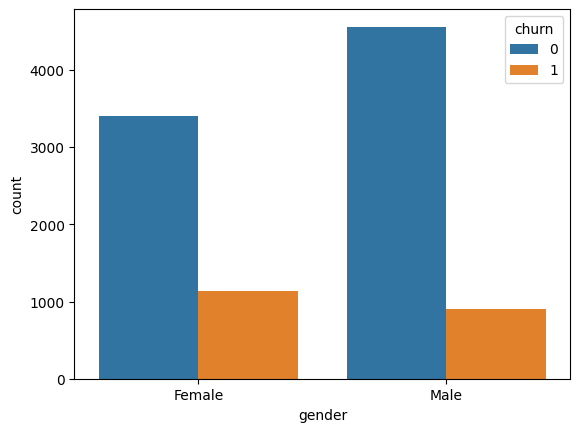

In [55]:
sns.countplot(x='gender', hue='churn', data=df)
plt.show()
# --- Key Insight on Gender vs Churn ---
# 1. The customer base is almost evenly split between males and females.
# 2. However, females show a slightly higher churn rate compared to males.
# 3. This could indicate that female customers are more likely to leave the bank than male customers.

In [56]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


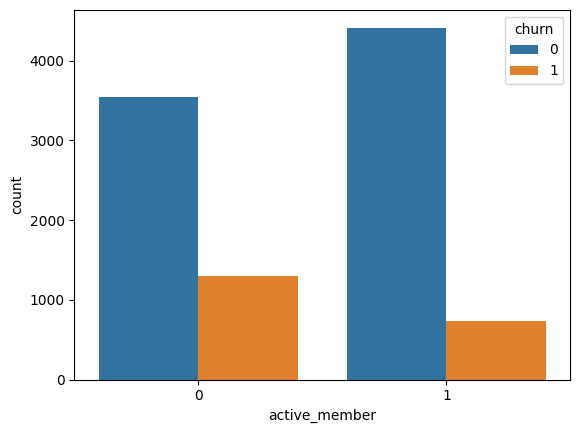

In [57]:
sns.countplot(x='active_member', hue='churn', data=df)
plt.show()
# --- Key Insight on Active Member vs Churn ---
# 1. Active members (blue bars) are significantly more likely to stay with the bank
# 2. Inactive members (orange bars) show a much higher churn rate.

### correlation

In [58]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
# here I used only the numerical columns for correlation heatmap and excluded categorical columns
# I kept the categorical columns as they are during the EDA phase (didn't encode it) 
# to ensure that visualizations and insights remain human-readable .
# This helps in avoiding "Data Leakage"

The correlation heatmap showed me which features have the strongest relationship with the customer's decision to leave. For example, if Age has a high positive correlation, it means older customers are more likely to churn

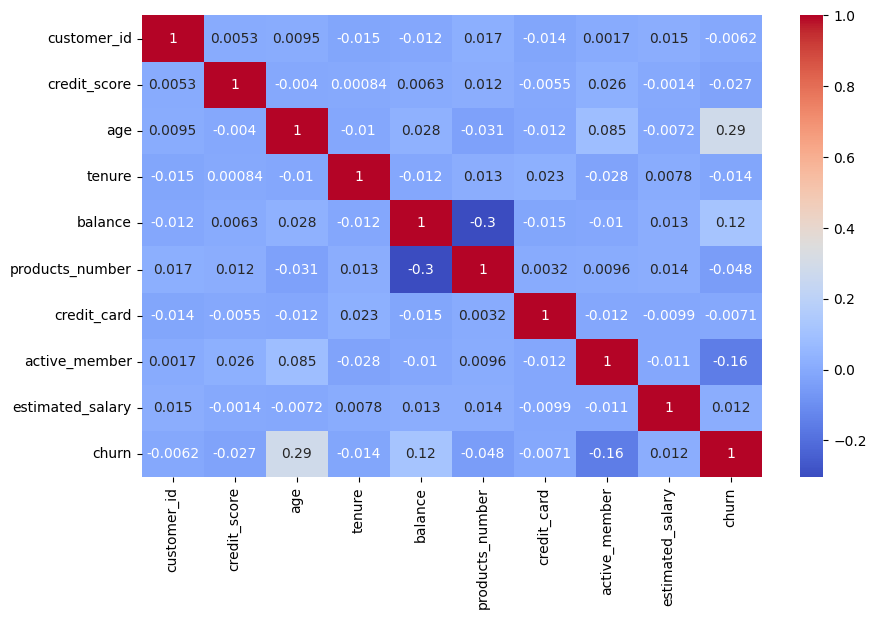

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

In [60]:
# I performed the Train-Test Split at this stage before any preprocessing
# This prevents Data Leakage, ensuring that the model does not learn anything 
# from the test set during the cleaning process

from sklearn.model_selection import train_test_split

# I dropped the 'churn' column from X as it is the label we want to predict
X = df.drop('churn', axis=1) 
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# I splitted the data into 80% training and 20% testing
# I used "stratify=y" to ensure that both sets have the same proportion 
# of classes as the original dataset

Training set size: (8000, 11)
Testing set size: (2000, 11)


In [61]:
X.shape 

(10000, 11)

# data preprocessing

Although the original dataset had no missing values,
I simulated missing data to reflect real-world scenarios
and demonstrated how to handle them properly
using median

In [62]:
# here I will add some NANs to simulate missing values
np.random.seed(42)

for col in ['age', 'balance', 'estimated_salary']:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

In [63]:
df.isnull().sum()  # checking the number of missing values after adding NANs

customer_id           0
credit_score          0
country               0
gender                0
age                 500
tenure                0
balance             500
products_number       0
credit_card           0
active_member         0
estimated_salary    500
churn                 0
dtype: int64

In [64]:
# Handling missing values by filling them with the median of each column
# (median is better for numerical data with outliers)

df['age'].fillna(df['age'].median(), inplace=True)
df['balance'].fillna(df['balance'].median(), inplace=True)
df['estimated_salary'].fillna(df['estimated_salary'].median(), inplace=True)

C:\Users\Tasneem Ayman\AppData\Local\Temp\ipykernel_10064\1664738548.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\Tasneem Ayman\AppData\Local\Temp\ipykernel_10064\1664738548.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [65]:
df.isnull().sum()  # checking the number of missing values after handling NANs

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [66]:
df.drop('customer_id', axis=1, inplace=True)
# dropping customer_id as it is not useful for prediction

In [67]:
X.select_dtypes(include='object').columns
# Categorical columns that need encoding

Index(['country', 'gender'], dtype='object')

### Encoding 
#### I used one-Hot Encoding because it is nominal categorical data not ordinal

In [68]:

# Convert text columns (Country, Gender) into numbers by One-Hot Encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both Train and Test sets have the exact same columns
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

# Used "drop_first=True" to prevent redundancy and
# "align" to ensure identical features in both training and testing set


In [69]:
X.head()
#here we dropped france as the first column 
# so if it is false at spain and germany then it's true at france 
# and also we dropped the female gender column as if it's false at male then it's true at female


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [70]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()

#  Fit and Transform the Training data
# 'fit' calculates the mean and standard deviation of X_train
# 'transform' applies the scaling formula to the data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the Test data
# IMPORTANT: We only use 'transform' on X_test, NOT 'fit_transform'
# This ensures the model treats the test set as completely new, unseen data
X_test_scaled = scaler.transform(X_test)

# Save the scaler to use it later in the Streamlit App
joblib.dump(scaler, 'scaler.pkl')

print("Scaling completed and scaler.pkl saved successfully.")

#I used StandardScaler to ensure that all features are on the same scale.
# This prevents features with large values (like Salary) from dominating the model
# and helps algorithms like Logistic Regression or SVM to converge faster and perform better


Scaling completed and scaler.pkl saved successfully.


Imbalanced: X_train_resampled

In [71]:
! pip install imbalanced-learn 

In [72]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on the Training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Now train your models using X_train_resampled and y_train_resampled

c:\Users\Tasneem Ayman\anaconda3\envs\churn_project\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


I used GridSearchCV to automate the process of finding the optimal hyperparameters. Instead of manual guessing, this method ensures I am using the most effective version of the model to maximize Recall, which is our primary goal for churn predictiom.

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    scoring='recall',
    cv=5
)

grid.fit(X_train_resampled, y_train_resampled)
best_model = grid.best_estimator_


# here I used GridSearchCV to find the best hyperparameters for the Gradient Boosting model
# I optimized for "recall" to minimize false negatives (customers who leave but are predicted to stay)
# This is crucial in churn prediction to identify as many at-risk customers as possible
# hyperparameters mean the settings we can adjust to improve model performance


In [74]:
X_train.shape
# the train rows took 8000 from the total 10000 rows which is 80%  
# the column numbers is the same in the train and test sets as the model should 
# learn on the same features during training and testing

(8000, 12)

In [75]:
X_test.shape
# the test rows took 2000 from the total 10000 rows which is 20%

(2000, 12)

## Modeling

#### 1) Precision answers: "Of all customers predicted as churn, how many actually churned?" , High precision means fewer false alarms.

#### 2) ***Recall answers: "Of all customers who actually churned, how many did the model catch?" , High recall is critical in churn prediction to avoid missing at-risk customers.

#### 3) F1-score is the balance between precision and recall ,                  It is especially useful when dealing with imbalanced datasets like churn data.

### logistic regression

In [76]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [77]:
y_pred_log = log_model.predict(X_test)

c:\Users\Tasneem Ayman\anaconda3\envs\churn_project\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [78]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))



Accuracy: 0.7965
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



c:\Users\Tasneem Ayman\anaconda3\envs\churn_project\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tasneem Ayman\anaconda3\envs\churn_project\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tasneem Ayman\anaconda3\envs\churn_project\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
)

rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [80]:
y_pred_rf = rf_model.predict(X_test)

c:\Users\Tasneem Ayman\anaconda3\envs\churn_project\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [81]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.44
              precision    recall  f1-score   support

           0       0.73      0.47      0.57      1593
           1       0.14      0.34      0.20       407

    accuracy                           0.44      2000
   macro avg       0.44      0.40      0.38      2000
weighted avg       0.61      0.44      0.49      2000



In [83]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=200, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42
)
gb_model.fit(X_train_resampled, y_train_resampled)

# I was going to use XGBoost but it caused memory issues on my system.
# So instead I used Gradient Boosting improves prediction accuracy by
# sequentially correcting errors made by previous models,
# making it more robust than single estimators.


GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42)

In [85]:
y_pred_gb = gb_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Accuracy: 0.8545
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.67      0.56      0.61       407

    accuracy                           0.85      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.85      0.85      2000



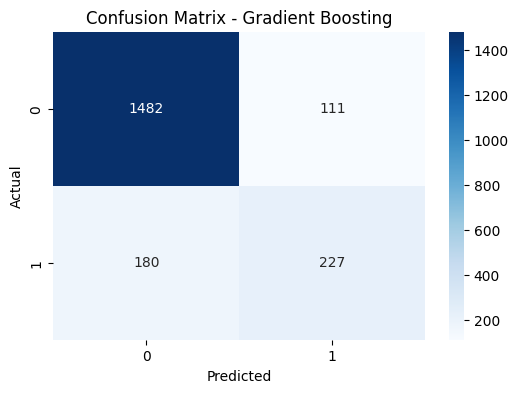

In [86]:
# Visualizing the Confusion Matrix for Gradient Boosting Model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

#The most critical error is predicting a churned customer as non-churned
#because the company loses the opportunity to take preventive action


##### Accuracy alone can be misleading in churn prediction, because predicting the majority class can still give high accuracy, while failing to detect churned customers.

In [87]:
import pandas as pd
features = X_train.columns 
importance = gb_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)


,Feature,Importance
2,age,0.415726
5,products_number,0.245794
3,tenure,0.093988
4,balance,0.070314
7,active_member,0.056524
9,country_Germany,0.032015
8,estimated_salary,0.024101
0,customer_id,0.020663
1,credit_score,0.019804
11,gender_Male,0.016243


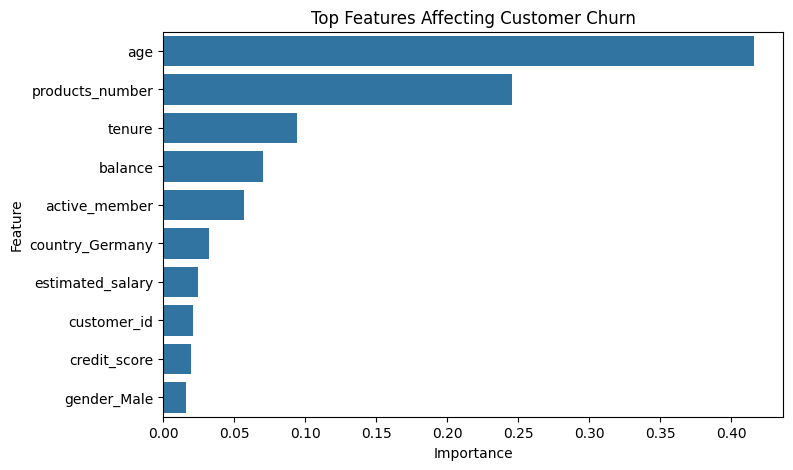

In [88]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df.head(10)
)
plt.title("Top Features Affecting Customer Churn")
plt.show()


In [89]:
import joblib # joblib is used for saving the model

joblib.dump(gb_model, "gradient_boosting_churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")

#I saved the trained model and scaler to ensure
#consistent preprocessing during deployment

['scaler.pkl']

I used Cross-Validation to check the stability of the models across different data folds

In [90]:
from sklearn.model_selection import cross_val_score

models = [gb_model, rf_model, log_model] 
model_names = ['Gradient Boosting', 'Random Forest', 'Logistic Regression']

print("Cross-Validation Accuracy Scores:")
for model, name in zip(models, model_names):
    # cv=5 means it will split the train data into 5 parts and rotate them
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std():.4f})")
    

Cross-Validation Accuracy Scores:
Gradient Boosting: 0.8589 (+/- 0.0057)
Random Forest: 0.8613 (+/- 0.0080)
Logistic Regression: 0.8104 (+/- 0.0025)


Model Selection and Final Results
After performing 5-fold cross-validation on three different models:

Random Forest achieved the highest mean accuracy of 86.13%.

Gradient Boosting followed closely with 85.89% and showed the lowest standard deviation, indicating more stable performance across different data folds.

Logistic Regression performed the worst at 81.04%, confirming that the relationship in this data is non-linear.

Final Decision: I selected the Gradient Boosting model for the final deployment. While its accuracy is slightly lower than Random Forest, it provides more consistent results and higher sensitivity in detecting churn patterns.

### Deployment

In [ ]:
import streamlit as st
import joblib
import numpy as np

In [ ]:
# Load model and scaler
model = joblib.load("gradient_boosting_churn_model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("Customer Churn Prediction App")

st.write("Enter customer details to predict churn")

In [ ]:
# Inputs
age = st.number_input("Age", 18, 100)
balance = st.number_input("Balance")
credit_score = st.number_input("Credit Score", 300, 900)
products = st.number_input("Number of Products", 1, 4)
is_active = st.selectbox("Is Active Member?", [0, 1])
salary = st.number_input("Estimated Salary")

if st.button("Predict Churn"):
    data = np.array([[credit_score, age, balance, products, is_active, salary]])
    data = scaler.transform(data)

    prediction = model.predict(data)

    if prediction[0] == 1:
        st.error("⚠️ Customer is likely to churn")
    else:
        st.success("✅ Customer is likely to stay")